In [1]:
# we're in the endgame now

from controller import *
%matplotlib inline

Starting at timestep 1


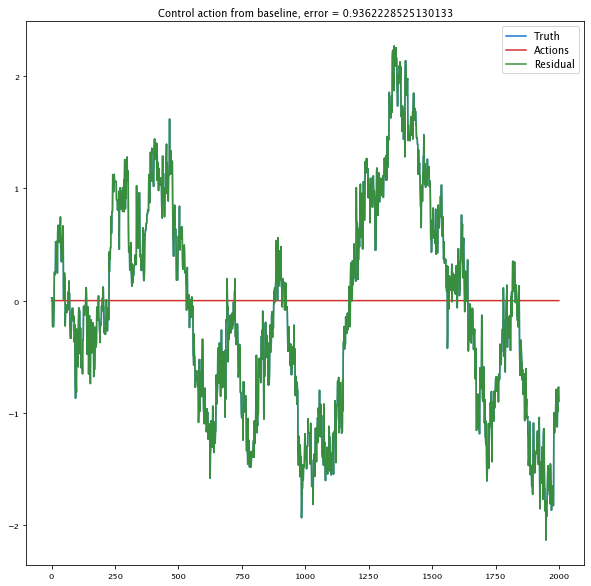

In [2]:
show_control('baseline')

Starting at timestep 3


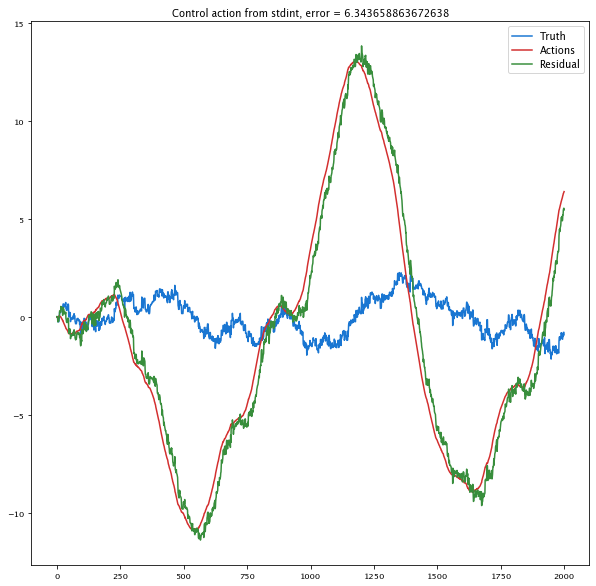

In [3]:
show_control('stdint')

[ 0.04221359 -0.35773254 -0.14586478 -0.23658216 -0.28470823 -0.25664056
  0.00318771  0.01937262 -0.0082395   0.12304065]
Starting at timestep 10
Prior:  [-0.92648742 -0.8464389  -0.84864898 -0.86733736 -0.99945962 -0.88933902
 -1.08589707 -1.16393868 -0.80208974 -0.80774358]
Updated with measurement -0.028168107335854273: [-0.03138805 -0.8465241  -0.84852609 -0.86728969 -0.99933324 -0.88917965
 -1.08569446 -1.16357659 -0.80168522 -0.80678491]
Prior:  [-0.9220096  -0.03138805 -0.8465241  -0.84852609 -0.86728969 -0.99933324
 -0.88917965 -1.08569446 -1.16357659 -0.80168522]
Updated with measurement 0.20325107406774795: [ 0.19921768 -0.03149478 -0.84637018 -0.84846638 -0.86713139 -0.99913361
 -0.88892586 -1.08524089 -1.16306987 -0.80048437]
Prior:  [-0.9710672   0.19921768 -0.03149478 -0.84637018 -0.84846638 -0.86713139
 -0.99913361 -0.88892586 -1.08524089 -1.16306987]
Updated with measurement 0.1935199431644628: [ 0.18934559  0.19910722 -0.03133547 -0.84630838 -0.84830255 -0.86692478
 -

 -0.19540257 -0.46786633 -0.42170012 -0.16516251]
Updated with measurement -0.05068781357882166: [-0.05141721 -0.08203395 -0.22133742 -0.24653601 -0.23711156 -0.22803697
 -0.19535667 -0.46778431 -0.42160848 -0.16494534]
Prior:  [-0.29482819 -0.05141721 -0.08203395 -0.22133742 -0.24653601 -0.23711156
 -0.22803697 -0.19535667 -0.46778431 -0.42160848]
Updated with measurement -0.085798619806773: [-0.08654787 -0.05143704 -0.08200536 -0.22132633 -0.2465066  -0.23707448
 -0.22798983 -0.19527242 -0.46769018 -0.42138541]
Prior:  [-0.34676168 -0.08654787 -0.05143704 -0.08200536 -0.22132633 -0.2465066
 -0.23707448 -0.22798983 -0.19527242 -0.46769018]
Updated with measurement 0.0010015107408154755: [-2.45013633e-04 -8.65808512e-02 -5.13894688e-02 -8.19869049e-02
 -2.21277407e-01 -2.46444904e-01 -2.36996044e-01 -2.27849651e-01
 -1.95115815e-01 -4.67319057e-01]
Prior:  [-2.80571890e-01 -2.45013633e-04 -8.65808512e-02 -5.13894688e-02
 -8.19869049e-02 -2.21277407e-01 -2.46444904e-01 -2.36996044e-01
 

Updated with measurement 0.6340939801412011: [0.6330967  0.55388211 0.62754605 0.64931663 0.4889384  0.27905137
 0.10790636 0.25754392 0.24121694 0.34162861]
Prior:  [0.29440906 0.6330967  0.55388211 0.62754605 0.64931663 0.4889384
 0.27905137 0.10790636 0.25754392 0.24121694]
Updated with measurement 0.5716700188122011: [0.5706762  0.6330704  0.55392004 0.62756076 0.64935564 0.48898759
 0.27911391 0.10801812 0.25766877 0.24151283]
Prior:  [0.29527538 0.5706762  0.6330704  0.55392004 0.62756076 0.64935564
 0.48898759 0.27911391 0.10801812 0.25766877]
Updated with measurement 0.6031585988048298: [0.60205502 0.570647   0.63311251 0.55393637 0.62760407 0.64941026
 0.48905703 0.27923801 0.10815676 0.25799734]
Prior:  [0.30466869 0.60205502 0.570647   0.63311251 0.55393637 0.62760407
 0.64941026 0.48905703 0.27923801 0.10815676]
Updated with measurement 0.6616427651471175: [0.66036323 0.60202116 0.57069583 0.63313146 0.55398659 0.6276674
 0.64949077 0.48920092 0.27939876 0.10853772]
Prior: 

 -0.18009026 -0.03075474 -0.18248368  0.00195554]
Updated with measurement -0.05707458141056466: [-0.05699922 -0.06850773 -0.00963408 -0.14868465  0.09197386  0.03477451
 -0.18009501 -0.03076321 -0.18249315  0.0019331 ]
Prior:  [-0.07848877 -0.05699922 -0.06850773 -0.00963408 -0.14868465  0.09197386
  0.03477451 -0.18009501 -0.03076321 -0.18249315]
Updated with measurement -0.4929751117975046: [-0.49148942 -0.0569599  -0.06856443 -0.00965608 -0.14874296  0.09190033
  0.03468103 -0.18026208 -0.03094986 -0.18293548]
Prior:  [-0.07193717 -0.49148942 -0.0569599  -0.06856443 -0.00965608 -0.14874296
  0.09190033  0.03468103 -0.18026208 -0.03094986]
Updated with measurement -0.3838001883140153: [-0.38268234 -0.49145985 -0.05700256 -0.06858098 -0.00969995 -0.14879829
  0.09182999  0.03455533 -0.18040251 -0.03128267]
Prior:  [-0.06979835 -0.38268234 -0.49145985 -0.05700256 -0.06858098 -0.00969995
 -0.14879829  0.09182999  0.03455533 -0.18040251]
Updated with measurement -0.5833910071385585: [-0

Updated with measurement -1.5600493940551299: [-1.55941763 -1.33012148 -1.42782827 -1.38072663 -1.30702833 -1.42875188
 -1.44452969 -1.5993841  -1.47680772 -1.33110126]
Prior:  [-1.42342059 -1.55941763 -1.33012148 -1.42782827 -1.38072663 -1.30702833
 -1.42875188 -1.44452969 -1.5993841  -1.47680772]
Updated with measurement -1.3295046688259402: [-1.3298413  -1.55942654 -1.33010863 -1.42782328 -1.38071342 -1.30701167
 -1.4287307  -1.44449183 -1.59934181 -1.47670749]
Prior:  [-1.49146621 -1.3298413  -1.55942654 -1.33010863 -1.42782328 -1.38071342
 -1.30701167 -1.4287307  -1.44449183 -1.59934181]
Updated with measurement -1.3156360901312578: [-1.31626634 -1.32985798 -1.55940249 -1.3300993  -1.42779855 -1.38068223
 -1.30697201 -1.42865983 -1.44441265 -1.59915417]
Prior:  [-1.46241239 -1.31626634 -1.32985798 -1.55940249 -1.3300993  -1.42779855
 -1.38068223 -1.30697201 -1.42865983 -1.44441265]
Updated with measurement -1.2903204831644428: [-1.29093733 -1.31628266 -1.32983444 -1.55939336 -1.33

Updated with measurement -1.3717499378526719: [-1.37131017 -1.35706633 -1.31437053 -1.11754441 -1.44602971 -1.3376894
 -1.53650316 -1.07297304 -1.2203323  -1.22898691]
Prior:  [-1.25693678 -1.37131017 -1.35706633 -1.31437053 -1.11754441 -1.44602971
 -1.3376894  -1.53650316 -1.07297304 -1.2203323 ]
Updated with measurement -1.6637268970890589: [-1.6622688  -1.37127159 -1.35712198 -1.31439212 -1.11760163 -1.44610188
 -1.33778114 -1.53666713 -1.07315622 -1.22076642]
Prior:  [-1.23823909 -1.6622688  -1.37127159 -1.35712198 -1.31439212 -1.11760163
 -1.44610188 -1.33778114 -1.53666713 -1.07315622]
Updated with measurement -1.648724064324974: [-1.64725272 -1.66222986 -1.37132774 -1.35714376 -1.31444986 -1.11767446
 -1.44619446 -1.3379466  -1.53685197 -1.07359428]
Prior:  [-1.32451297 -1.64725272 -1.66222986 -1.37132774 -1.35714376 -1.31444986
 -1.11767446 -1.44619446 -1.3379466  -1.53685197]
Updated with measurement -1.6868384631550999: [-1.68553974 -1.64721835 -1.66227943 -1.37134696 -1.3571

Updated with measurement 0.5124761709807671: [0.51235665 0.75189097 0.94154813 0.76968037 0.88341545 0.47735218
 0.39431479 0.67613041 0.52226325 0.36166705]
Prior:  [0.52145946 0.51235665 0.75189097 0.94154813 0.76968037 0.88341545
 0.47735218 0.39431479 0.67613041 0.52226325]
Updated with measurement 0.620468309742578: [0.62011342 0.51234726 0.75190451 0.94155338 0.7696943  0.88343302
 0.47737451 0.3943547  0.67617499 0.52236891]
Prior:  [0.59896546 0.62011342 0.51234726 0.75190451 0.94155338 0.7696943
 0.88343302 0.47737451 0.3943547  0.67617499]
Updated with measurement 0.8840866383163322: [0.88306465 0.62008638 0.51238626 0.75191964 0.94159349 0.76974488
 0.88349732 0.47748944 0.3944831  0.67647927]
Prior:  [0.60229988 0.88306465 0.62008638 0.51238626 0.75191964 0.94159349
 0.76974488 0.88349732 0.47748944 0.3944831 ]
Updated with measurement 0.883872030190106: [0.88286276 0.88303794 0.6201249  0.5124012  0.75195925 0.94164344
 0.76980839 0.88361082 0.47761623 0.39478358]
Prior:  

Updated with measurement 1.663434556501887: [1.66503692 1.9362286  1.99860976 2.12334519 2.16856374 2.15941216
 2.3159412  2.09910893 2.15607368 2.10320248]
Prior:  [2.15408214 1.66503692 1.9362286  1.99860976 2.12334519 2.16856374
 2.15941216 2.3159412  2.09910893 2.15607368]
Updated with measurement 1.7102733218855097: [1.71186411 1.66507901 1.93616789 1.99858621 2.12328276 2.16848501
 2.15931207 2.31576231 2.09890908 2.15560005]
Prior:  [2.14250847 1.71186411 1.66507901 1.93616789 1.99858621 2.12328276
 2.16848501 2.15931207 2.31576231 2.09890908]
Updated with measurement 1.8623237066674783: [1.863328   1.71189069 1.66504068 1.93615303 1.99854679 2.12323305
 2.16842181 2.15919913 2.31563614 2.09861007]
Prior:  [2.15456274 1.863328   1.71189069 1.66504068 1.93615303 1.99854679
 2.12323305 2.16842181 2.15919913 2.31563614]
Updated with measurement 2.0724305204971643: [2.07272492 1.86333579 1.71187945 1.66503632 1.93614147 1.99853222
 2.12321453 2.16838871 2.15916215 2.31554849]
Prior:

Updated with measurement 0.6465001287688994: [0.64608815 0.56314625 0.67217554 0.86062577 0.56758072 0.68651881
 0.51303714 0.68843655 0.63944434 0.50504607]
Prior:  [0.59860993 0.64608815 0.56314625 0.67217554 0.86062577 0.56758072
 0.68651881 0.51303714 0.68843655 0.63944434]
Updated with measurement 0.5785458069671867: [0.57861772 0.64609006 0.5631435  0.67217448 0.86062295 0.56757716
 0.68651429 0.51302906 0.68842751 0.63942293]
Prior:  [0.65194504 0.57861772 0.64609006 0.5631435  0.67217448 0.86062295
 0.56757716 0.68651429 0.51302906 0.68842751]
Updated with measurement 0.5786810108505005: [0.57894362 0.57862467 0.64608003 0.56313961 0.67216417 0.86060995
 0.56756064 0.68648476 0.51299606 0.68834933]
Prior:  [0.62539766 0.57894362 0.57862467 0.64608003 0.56313961 0.67216417
 0.86060995 0.56756064 0.68648476 0.51299606]
Updated with measurement 0.6358557628132048: [0.63581828 0.57894263 0.5786261  0.64608059 0.56314108 0.67216603
 0.86061231 0.56756486 0.68648947 0.51300722]
Prior

Prior:  [0.18075166 0.24691001 0.20845284 0.01648799 0.01277118 0.2031654
 0.251199   0.11371824 0.29559417 0.17484585]
Updated with measurement 0.35691543302614515: [0.35628399 0.2468933  0.20847694 0.01649734 0.01279596 0.20319665
 0.25123873 0.11378925 0.29567349 0.17503385]
Prior:  [0.19778677 0.35628399 0.2468933  0.20847694 0.01649734 0.01279596
 0.20319665 0.25123873 0.11378925 0.29567349]
Updated with measurement -0.19144543722848498: [-0.19005027  0.35632091  0.24684006  0.20845628  0.01644258  0.01272691
  0.20310886  0.25108184  0.11361398  0.29525812]
Prior:  [ 0.20467013 -0.19005027  0.35632091  0.24684006  0.20845628  0.01644258
  0.01272691  0.20310886  0.25108184  0.11361398]
Updated with measurement -0.3652826538656061: [-0.36323971 -0.18999621  0.35624294  0.24680981  0.20837611  0.01634147
  0.01259836  0.20287913  0.25082519  0.11300574]
Prior:  [ 0.16305071 -0.36323971 -0.18999621  0.35624294  0.24680981  0.20837611
  0.01634147  0.01259836  0.20287913  0.25082519]

Prior:  [-0.51073059  0.16729318 -0.23467983 -0.20770826 -0.15694519 -0.37984787
 -0.35647985 -0.53104914 -0.44863578 -0.50509081]
Updated with measurement 0.12379592669714169: [ 0.12152153  0.167233   -0.23459304 -0.20767459 -0.15685593 -0.3797353
 -0.35633675 -0.53079338 -0.44835005 -0.50441366]
Prior:  [-0.42501456  0.12152153  0.167233   -0.23459304 -0.20767459 -0.15685593
 -0.3797353  -0.35633675 -0.53079338 -0.44835005]
Updated with measurement -0.07641230963454376: [-0.07766184  0.12148846  0.16728068 -0.23457454 -0.20762555 -0.15679408
 -0.37965667 -0.35619623 -0.5306364  -0.44797803]
Prior:  [-0.3941128  -0.07766184  0.12148846  0.16728068 -0.23457454 -0.20762555
 -0.15679408 -0.37965667 -0.35619623 -0.5306364 ]
Updated with measurement -0.6826300127519169: [-0.68159585 -0.07763448  0.121449    0.16726537 -0.23461512 -0.20767673
 -0.15685916 -0.37977297 -0.35632615 -0.5309443 ]
Prior:  [-0.32408719 -0.68159585 -0.07763448  0.121449    0.16726537 -0.23461512
 -0.20767673 -0.156

Prior:  [-1.90243791 -1.54203869 -1.53910871 -1.74763759 -1.85887303 -1.75050773
 -1.83184336 -1.90218362 -1.88043458 -2.11442556]
Updated with measurement -1.710100730622013: [-1.71079015 -1.54205693 -1.5390824  -1.74762738 -1.85884597 -1.75047361
 -1.83179998 -1.9021061  -1.88034797 -2.1142203 ]
Prior:  [-1.91643097 -1.71079015 -1.54205693 -1.5390824  -1.74762738 -1.85884597
 -1.75047361 -1.83179998 -1.9021061  -1.88034797]
Updated with measurement -1.5038419356015167: [-1.50532082 -1.71082928 -1.54200049 -1.53906051 -1.74756934 -1.85877277
 -1.75038055 -1.83163368 -1.9019203  -1.87990767]
Prior:  [-1.8432781  -1.50532082 -1.71082928 -1.54200049 -1.53906051 -1.74756934
 -1.85877277 -1.75038055 -1.83163368 -1.9019203 ]
Updated with measurement -1.6025235352465843: [-1.6033865  -1.50534366 -1.71079635 -1.54198772 -1.53902664 -1.74752663
 -1.85871847 -1.75028351 -1.83152526 -1.90166337]
Prior:  [-1.80515214 -1.6033865  -1.50534366 -1.71079635 -1.54198772 -1.53902664
 -1.74752663 -1.8587

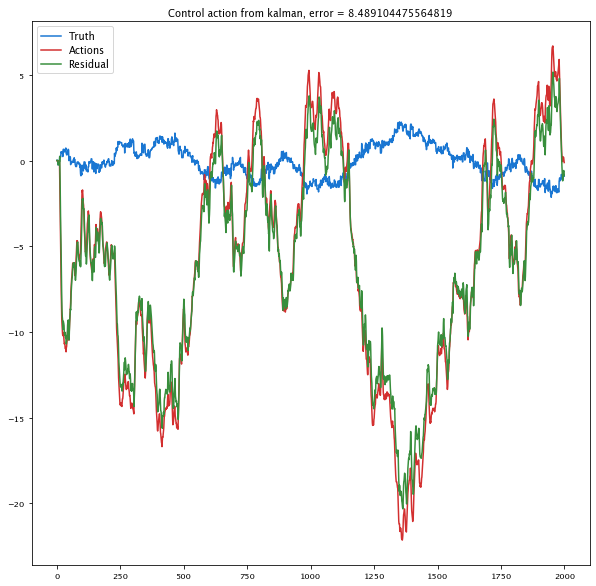

In [8]:
print(kalman.kfilter.state)
show_control('kalman')

(1e-07, 2.6630869514667626)

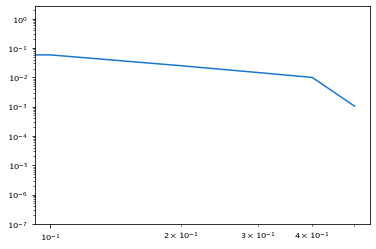

In [5]:
plt.loglog(*signal.periodogram(kalman.kfilter.A[0]))
plt.ylim(1e-7)

In [6]:
kalman = Controller('kalman', make_kfilter_turb(make_impulse(truth[:size//2], N=N), truth[:N] + np.random.normal(0, noise, (N,))))


In [7]:
kalman.state

array([], dtype=float64)